In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
green_data = pd.read_csv('C:/Users/asgas/Desktop/Prototipo tesis/Data/Training and validation data/green_banana_data.csv')
light_data = pd.read_csv('C:/Users/asgas/Desktop/Prototipo tesis/Data/Training and validation data/light_banana_data.csv')
yellow_data = pd.read_csv('C:/Users/asgas/Desktop/Prototipo tesis/Data/Training and validation data/yellow_banana_data.csv')
black_data = pd.read_csv('C:/Users/asgas/Desktop/Prototipo tesis/Data/Training and validation data/black_banana_data.csv')

In [3]:
green_data['label'] = 'green'
light_data['label'] = 'light'
yellow_data['label'] = 'yellow'
black_data['label'] = 'black'

In [4]:
data = pd.concat([green_data, light_data, yellow_data, black_data], ignore_index=True)

X = data.iloc[:, :-1].values
y = data['label'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_binarized = label_binarize(y_encoded, classes=list(range(4)))

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

y_test_binarized = label_binarize(y_test_encoded, classes=list(range(4)))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
best_dt_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
dt_clf = DecisionTreeClassifier(**best_dt_params, random_state=0)
dt_clf.fit(X_train, y_train_encoded)

DecisionTreeClassifier(random_state=0)

In [6]:
best_kn_params = {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
kn_clf = KNeighborsClassifier(**best_kn_params)
kn_clf.fit(X_train, y_train_encoded)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [7]:
best_rf_params = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
rf_clf = RandomForestClassifier(**best_rf_params, random_state=0)
rf_clf.fit(X_train, y_train_encoded)

RandomForestClassifier(max_depth=10, random_state=0)

In [8]:
best_svm_params = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
svm_clf = SVC(**best_svm_params, random_state=0)
svm_clf.fit(X_train, y_train_encoded)

SVC(C=100, gamma=0.1, random_state=0)

In [9]:
best_xgb_params = {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
xgb_clf = xgb.XGBClassifier(**best_xgb_params, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_encoded)

c:\Users\asgas\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [10]:
def plot_roc_curve(y_test, y_score, title):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [11]:
y_test_1d = np.ravel(y_test_encoded)
y_test_binary = np.array([1 if label == 1 else 0 for label in y_test_1d])
green_index = 1

In [12]:
y_score_dt = dt_clf.predict_proba(X_test)[:, green_index]
y_score_kn = kn_clf.predict_proba(X_test)[:, green_index]
y_score_rf = rf_clf.predict_proba(X_test)[:, green_index]
y_score_svm = svm_clf.decision_function(X_test)[:, green_index]
y_score_xgb = xgb_clf.predict_proba(X_test)[:, green_index]

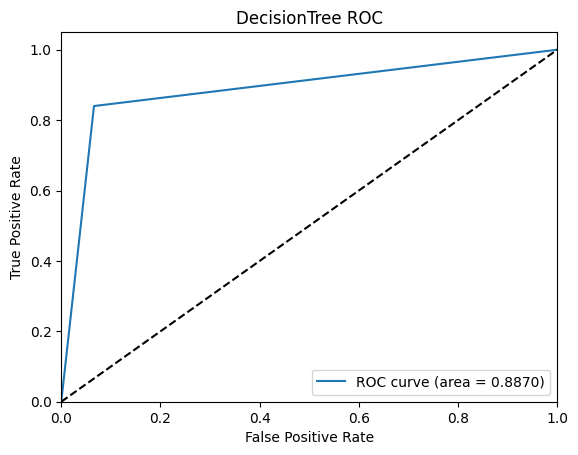

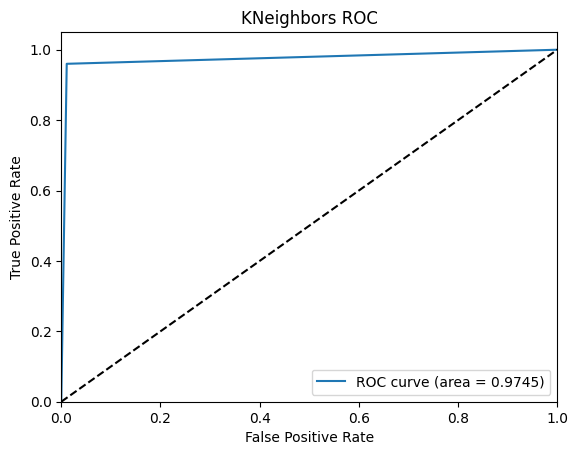

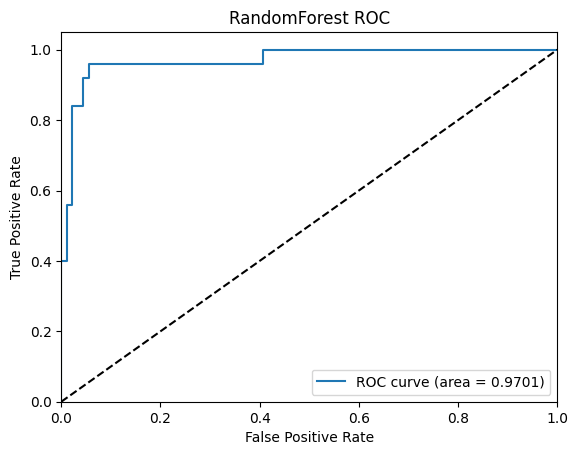

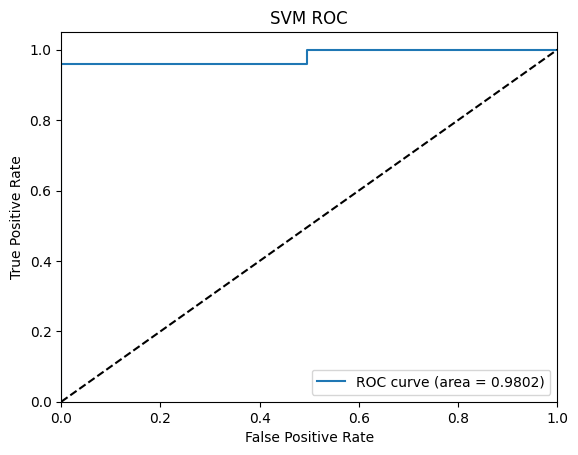

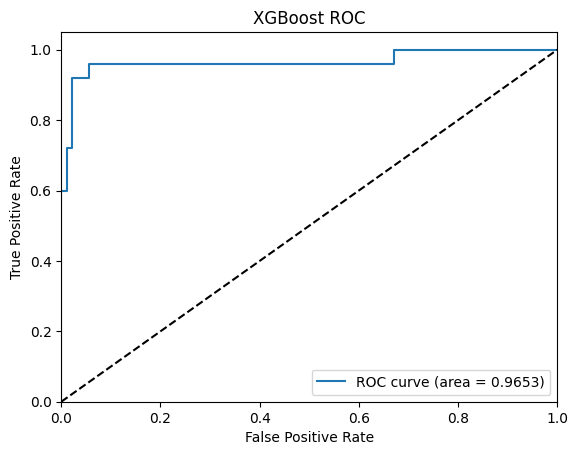

In [15]:
plot_roc_curve(y_test_binary, y_score_dt, 'DecisionTree ROC')
plot_roc_curve(y_test_binary, y_score_kn, 'KNeighbors ROC')
plot_roc_curve(y_test_binary, y_score_rf, 'RandomForest ROC')
plot_roc_curve(y_test_binary, y_score_svm, 'SVM ROC')
plot_roc_curve(y_test_binary, y_score_xgb, 'XGBoost ROC')